In [1]:
import os
import pathlib
import random
import sys

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
os.getcwd()
INSPECTION_PATH = pathlib.Path(os.getcwd()).parent / "country-backend"
sys.path.append(str(INSPECTION_PATH.absolute()))

In [3]:
from country.model.predict import model
from country.model.predict import preprocess, prediction, predict_image

In [4]:
from country.explainer.new_lime_ import explain_image, create_segments, generate_samples, generate_images, predict_images, weigh_segments, generate_visual_explanation
from PIL import Image


In [11]:
imgg = preprocess(cv2.imread("C:\\Users\\Matze\\Documents\\University\\Work\\BeispielBilder\\B\\jerusalem.jpg"))
print(predict_image(imgg))
imgg = np.squeeze(imgg)

Hamburg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


224


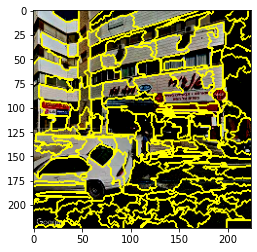

In [12]:
from skimage.segmentation import mark_boundaries
import time
seg= create_segments(img = imgg, seg_method = "slic", settings = {})
plt.imshow(mark_boundaries(imgg,seg))
print(len(seg))

In [13]:
"""
image_explanation = explain_image(img = imgg, seg_method = "felzenszwalb", seg_settings = {}, num_of_samples = 400, samples_p = 0.5,
                  model_ = model, threshold = 0.5, volume = 100, colour =  "green", transparency = True)

                 """


s=time.time()
segment_mask = create_segments(img=imgg, seg_method="slic", settings={})
print("create_segments: ", time.time()-s)
print()

s=time.time()
samples_theo = generate_samples(segment_mask=segment_mask, num_of_samples=400, p=0.5)
print("generate_samples: ", time.time()-s)
print()

s=time.time()
samples_imgs = generate_images(image=imgg, segment_mask=segment_mask, samples=samples_theo)
print("generate_images: ", time.time()-s)
print()

s=time.time()
samples_imgs_predictions = predict_images(images=samples_imgs, model_=model)
print("predict_images: ", time.time()-s)
print()

s=time.time()
weighted_segments = weigh_segments(samples=samples_theo, predictions=samples_imgs_predictions)
print("weigh_segments: ", time.time()-s)
print()

s=time.time()
visual_explanation = generate_visual_explanation(weighted_segments=weighted_segments, segment_mask=segment_mask,
                                                  image=imgg, threshold=0.0, volume=50, colour="green", transparency= 0.7)
print("generate_visual_explanation: ", time.time()-s)


gradient=[
np.ones((1,1)) * [119, 184, 53] / 255*1.0,
np.ones((1,1)) * [119, 184, 53] / 255*0.8,
np.ones((1,1)) * [119, 184, 53] / 255*0.6,
np.ones((1,1)) * [119, 184, 53] / 255*0.4,
np.ones((1,1)) * [119, 184, 53] / 255*0.2,
np.ones((1,1)) * [119, 184, 53] / 255*0.0,
]

create_segments:  0.07399845123291016

generate_samples:  0.0030002593994140625

generate_images:  8.170943260192871

predict_images:  18.98438572883606

weigh_segments:  0.014000415802001953

generate_visual_explanation:  0.34667420387268066


In [14]:
#felzenswalb ist faster than slic and quickshift

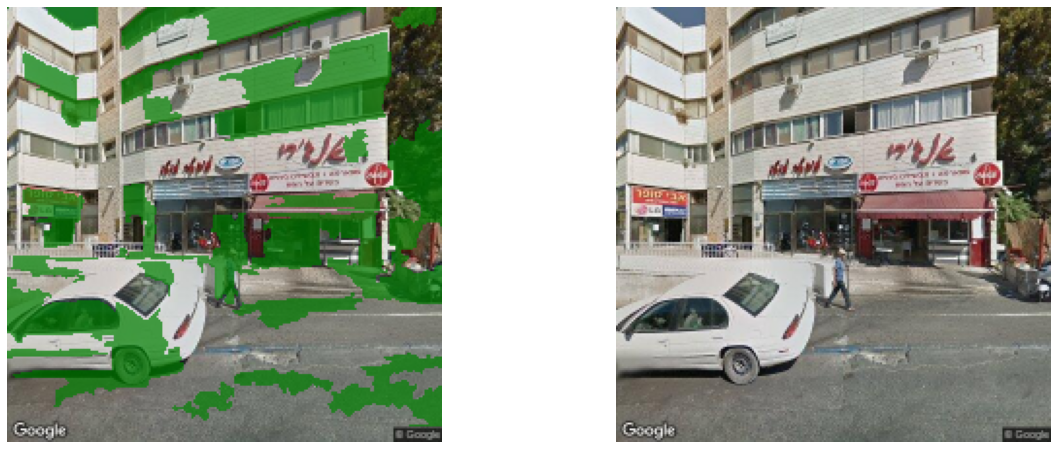

In [17]:


f, axarr = plt.subplots(1,2, figsize = (20, 8))
axarr[0].axis("off")
axarr[1].axis("off")
#axarr[0].imshow(((visual_explanation + 1) *127.5 )/255)
axarr[0].imshow((((visual_explanation +1)*127.5)/255))
axarr[1].imshow(((imgg + 1) *127.5 )/255)

In [16]:
# green tones have to differ more (use other model?)
#Notes:
# +1)*127.5) maybe unnecessary for other models (this occurs in lime (line 192) as well)
